In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Declare where are the files to load, then read them as CSV and merge them (using the "Mouse ID")
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_data = pd.read_csv("data/clinicaltrial_data.csv")

# Data versions ORIGINAL
tutti_data = pd.merge(mouse_data, clinical_data, how="outer", on="Mouse ID" )

# Second version, with Timepoint as "object" instead of integer
tutti_data_v2 = pd.merge(mouse_data, clinical_data, how="outer", on="Mouse ID" )
# Adjusting Timepoints as objects, instead of integers (if needed)
tutti_data_v2["Timepoint"] = tutti_data_v2["Timepoint"].astype("object")
# General exploration of the data for SECOND VERSION
#tutti_data_v2.info()
#tutti_data.dtypes
#tutti_data_v2.head()


# Third version, setting the 'Mouse ID' to be our index for easy referencing of rows
tutti_data_reindex = tutti_data.set_index("Mouse ID")
#tutti_data_reindex.head()

# 4th version, "how" = lefts, instead of "outer"
left_data = pd.merge(clinical_data,mouse_data, how="left", on=["Mouse ID", "Mouse ID"])

# General exploration of the data
#tutti_data.info()
#tutti_data.describe()
#tutti_data.head()
left_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [3]:
# With original data (no re-index, no timepoint as object)
# 1.1 Store the variable requested (e.g., Mean Tumor Volume) Grouped by Drug and Timepoint 
g_by_d_and_t = left_data.groupby(["Drug", "Timepoint"])
mtv = g_by_d_and_t["Tumor Volume (mm3)"].mean()

# 1.2 Convert to DataFrames
mtv_by_drug_time_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : mtv})
# Preview DataFrame
#mtv_by_drug_time_df.head()

# 1.3 Store the Standard Error Grouped by Drug and Timepoint
mtv_se = g_by_d_and_t["Tumor Volume (mm3)"].sem()

# 1.4 Convert to DataFrames
mtv_se_by_drug_time_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : mtv_se})

# 1.5 Preview DataFrame
mtv_se_by_drug_time_df.head()

Mean Tumor Volume (mm3)
Drug      Timepoint                         
Capomulin 0                         0.000000
          5                         0.448593
          10                        0.702684
          15                        0.838617
          20                        0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
# 1.6 Reset index 
mtv_by_drug_time_df = mtv_by_drug_time_df.reset_index()
mtv_se_by_drug_time_df = mtv_by_drug_time_df.reset_index()
# 1.7 use Pivot_table, then rearange the columns
munging_mtv = pd.pivot_table(mtv_by_drug_time_df,values="Mean Tumor Volume (mm3)", index="Timepoint", columns="Drug")
munging_se_mtv = pd.pivot_table(mtv_se_by_drug_time_df,values="Mean Tumor Volume (mm3)", index="Timepoint", columns="Drug")
# 1.8 Preview of reformatted work
#munging_mtv.head()
munging_se_mtv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


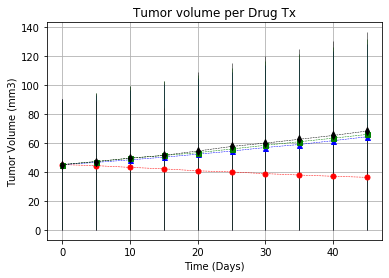

In [5]:
# Task 1. Creating a plot that shows how the tumor volume changes over time for each treatment.
    # Formatting: You must use proper labeling of your plots, including aspects like: 
    # Formatting: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
    # Formatting: Your plots must include error bars.

# 1.9.1 Generate the First Plot (with Error Bars)
plt.errorbar(munging_mtv.index, munging_mtv["Capomulin"], 
             yerr=munging_se_mtv["Capomulin"], color="r", 
             marker="o", markersize=5, linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(munging_mtv.index, munging_mtv["Ceftamin"], 
             yerr=munging_se_mtv["Ceftamin"], color="b", 
             marker="^", markersize=5, linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(munging_mtv.index, munging_mtv["Infubinol"], 
             yerr=munging_se_mtv["Infubinol"], color="g", 
             marker="s", markersize=5, linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(munging_mtv.index, munging_mtv["Placebo"], 
             yerr=munging_se_mtv["Placebo"], color="k", 
             marker="d", markersize=5, linestyle="dashed", 
             linewidth=0.50)

# Proper formatting
plt.title("Tumor volume per Drug Tx")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
#plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("task1_1.png")

# Show the Figure
plt.show()

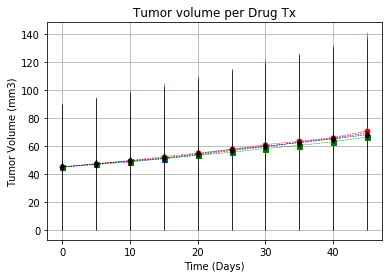

In [6]:
# 1.9.2 Generate the Second Plot (with Error Bars)
plt.errorbar(munging_mtv.index, munging_mtv["Ketapril"], 
             yerr=munging_se_mtv["Ketapril"], color="r", 
             marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mtv.index, munging_mtv["Naftisol"], 
             yerr=munging_se_mtv["Naftisol"], color="b", 
             marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mtv.index, munging_mtv["Propriva"], 
             yerr=munging_se_mtv["Propriva"], color="g", 
             marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mtv.index, munging_mtv["Placebo"], 
             yerr=munging_se_mtv["Placebo"], color="k", 
             marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor volume per Drug Tx")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
#plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("task1_2.png")

# Show the Figure
plt.show()

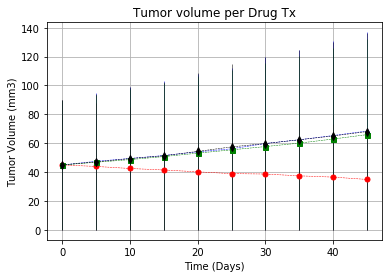

In [7]:
# 1.9.3 Generate the Third Plot (with Error Bars)
plt.errorbar(munging_mtv.index, munging_mtv["Ramicane"], yerr=munging_se_mtv["Ramicane"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mtv.index, munging_mtv["Stelasyn"], yerr=munging_se_mtv["Stelasyn"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mtv.index, munging_mtv["Zoniferol"], yerr=munging_se_mtv["Zoniferol"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mtv.index, munging_mtv["Placebo"], yerr=munging_se_mtv["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor volume per Drug Tx")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
#plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("task1_3.png")

# Show the Figure
plt.show()

In [8]:
# 2.1 Store variable
mms = g_by_d_and_t["Metastatic Sites"].mean()
# 2.2 Convert to DataFrames
mms_by_drug_time_df = pd.DataFrame({"Mean Metastatic Sites" : mms})
# Preview of DF
#mms_by_drug_time_df.head()
# 2.3 Store the SE grouped by Drug and Timepoint
mms_se = g_by_d_and_t["Metastatic Sites"].sem()
# 2.4 Convert to DF
mmse_se_by_drug_time_df = pd.DataFrame({"Mean Metastatic Sites" : mms_se})
# 2.5 Preview of DF
mmse_se_by_drug_time_df.head()

Mean Metastatic Sites
Drug      Timepoint                       
Capomulin 0                       0.000000
          5                       0.074833
          10                      0.125433
          15                      0.132048
          20                      0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames
# 2.6 Reset index 
mms_by_drug_time_df = mms_by_drug_time_df.reset_index()
mms_se_by_drug_time_df = mms_by_drug_time_df.reset_index()
# 2.7 use Pivot_table, then rearange the columns
munging_mms = pd.pivot_table(mms_by_drug_time_df,values="Mean Metastatic Sites", index="Timepoint", columns="Drug")
munging_se_mms = pd.pivot_table(mms_se_by_drug_time_df,values="Mean Metastatic Sites", index="Timepoint", columns="Drug")
# 1.8 Preview of reformatted work
#munging_mms.head()
munging_se_mms.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


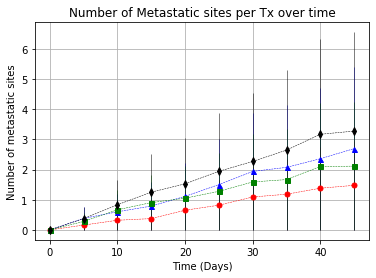

In [10]:
# Task 2. Creating a plot that shows how the number of metastatic (cancer spreading) sites 
# changes over time for each treatment.
    # Formatting: You must use proper labeling of your plots, including aspects like: 
    # Formatting: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
    # Formatting: Your scatter plots must include error bars.

    
# 2.9.1 Generate the First Plot (with Error Bars)
plt.errorbar(munging_mms.index, munging_mms["Capomulin"], 
             yerr=munging_se_mms["Capomulin"], color="r", 
             marker="o", markersize=5, linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(munging_mms.index, munging_mms["Ceftamin"], 
             yerr=munging_se_mms["Ceftamin"], color="b", 
             marker="^", markersize=5, linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(munging_mms.index, munging_mms["Infubinol"], 
             yerr=munging_se_mms["Infubinol"], color="g", 
             marker="s", markersize=5, linestyle="dashed", 
             linewidth=0.50)
plt.errorbar(munging_mms.index, munging_mms["Placebo"], 
             yerr=munging_se_mms["Placebo"], color="k", 
             marker="d", markersize=5, linestyle="dashed", 
             linewidth=0.50)

# Proper formatting
plt.title("Number of Metastatic sites per Tx over time")
plt.ylabel("Number of metastatic sites")
plt.xlabel("Time (Days)")
plt.grid(True)
#plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("task2_1.png")

# Show the Figure
plt.show()

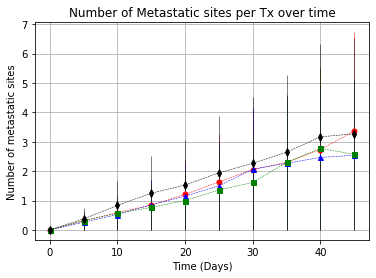

In [11]:
# 2.9.2 Generate the Second Plot (with Error Bars)
plt.errorbar(munging_mms.index, munging_mms["Ketapril"], 
             yerr=munging_se_mms["Ketapril"], color="r", 
             marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mms.index, munging_mms["Naftisol"], 
             yerr=munging_se_mms["Naftisol"], color="b", 
             marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mms.index, munging_mms["Propriva"], 
             yerr=munging_se_mms["Propriva"], color="g", 
             marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mms.index, munging_mms["Placebo"], 
             yerr=munging_se_mms["Placebo"], color="k", 
             marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Number of Metastatic sites per Tx over time")
plt.ylabel("Number of metastatic sites")
plt.xlabel("Time (Days)")
plt.grid(True)
#plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("task2_2.png")

# Show the Figure
plt.show()

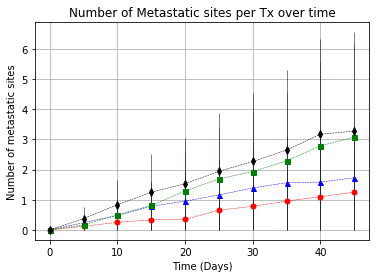

In [12]:
# 2.9.3 Generate the Third Plot (with Error Bars)
plt.errorbar(munging_mms.index, munging_mms["Ramicane"], 
             yerr=munging_se_mms["Ramicane"], color="r", 
             marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mms.index, munging_mms["Stelasyn"], 
             yerr=munging_se_mms["Stelasyn"], color="b", 
             marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mms.index, munging_mms["Zoniferol"], 
             yerr=munging_se_mms["Zoniferol"], color="g", 
             marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(munging_mms.index, munging_mms["Placebo"], 
             yerr=munging_se_mms["Placebo"], color="k", 
             marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Number of Metastatic sites per Tx over time")
plt.ylabel("Number of metastatic sites")
plt.xlabel("Time (Days)")
plt.grid(True)
#plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("task2_3.png")

# Show the Figure
plt.show()

In [14]:
# Task 3. Creating a plot that shows the number of mice still alive 
# through the course of treatment (Survival Rate)
    # Formatting: You must use proper labeling of your plots, including aspects like: 
    # Formatting: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
    # Formatting: Your scatter plots must include error bars.

# With original data (no re-index, no timepoint as object)
# 3.1 Store the variable requested (e.g., number of mice) Grouped by Drug and Timepoint 
n_mice = g_by_d_and_t["Mouse ID"].count()

# 3.2 Convert to DataFrames
nmice_by_drug_time_df = pd.DataFrame({"Mouse Count" : n_mice})

# 3.3 Preview DataFrame
nmice_by_drug_time_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [15]:
# 3.4 Reset index 
nmice_by_drug_time_df = nmice_by_drug_time_df.reset_index()
# 3.5 Pivot table
nmice_by_drug_time_df = nmice_by_drug_time_df.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# 3.6 Preview the Data Frame
nmice_by_drug_time_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


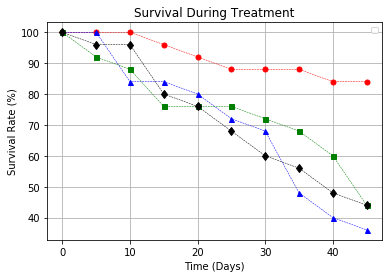

In [16]:
# 3.7 Plot Accounting for percentages
plt.plot(100 * nmice_by_drug_time_df["Capomulin"] / 25, "ro", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * nmice_by_drug_time_df["Infubinol"] / 25, "b^", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * nmice_by_drug_time_df["Ketapril"] / 25, "gs", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(100 * nmice_by_drug_time_df["Placebo"] / 25 , "kd", linestyle="dashed", markersize=6, linewidth=0.50)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# 3.8 Save the Figure
plt.savefig("Fig3.png")

# Show the Figure
plt.show()

In [17]:
# Task 4. Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
    # Formatting: Titles, Axes Labels, Legend Labels, etc.
    # Formatting: Your bar graph should indicate tumor growth as red and tumor reduction as green.
    # Formatting: It should also include a label with the percentage change for each bar. 

# 4.1 Calculate the percent changes for each drug
tumor_pct_change =  100 * (munging_mtv.iloc[-1] - munging_mtv.iloc[0]) / munging_mtv.iloc[0]
tumor_pct_change_sem =  100 * (munging_se_mtv.iloc[-1] - munging_se_mtv.iloc[0]) / munging_se_mtv.iloc[0]

# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

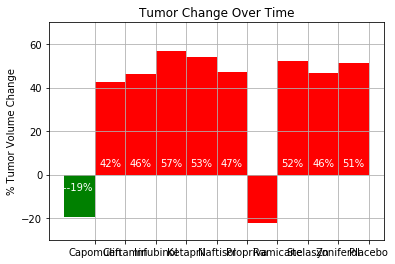

In [18]:
# 4.2 Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"], 
               tumor_pct_change["Ceftamin"], 
               tumor_pct_change["Infubinol"],
               tumor_pct_change["Ketapril"],
               tumor_pct_change["Naftisol"],
               tumor_pct_change["Propriva"], 
               tumor_pct_change["Ramicane"], 
               tumor_pct_change["Stelasyn"],
               tumor_pct_change["Zoniferol"], 
               tumor_pct_change["Placebo"])

# 4.3 Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color="green")
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color="red")

# 4.4 Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over Time")
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(("Capomulin", "Ceftamin", "Infubinol", "Ketapril", 
                    "Naftisol", "Propriva", "Ramicane", "Stelasyn",
                    "Zoniferol", "Placebo"))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)


# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("Fig4.png")

# Show the Figure
fig.show()

In [ ]:
# Task 5. Include 3 observations about the results of the study. Use the visualizations you generated 
# from the study data as the basis for your observations.

In [ ]:
# Use functions to label the percentages of changes
#def autolabelFail(rects):
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., 3,
#                '%d%%' % int(height),
#                ha='center', va='bottom', color="white")
#
#
#def autolabelPass(rects):
#    for rect in rects:
#        height = rect.get_height()
#       ax.text(rect.get_x() + rect.get_width()/2., -8,
#                '-%d%% ' % int(height),
#                ha='center', va='bottom', color="white")
# Call functions to implement the function calls
#autolabelPass(rectsPass)
#autolabelFail(rectsFail)
# Save the Figure
#fig.savefig("analysis/Fig4.png")
#
# Show the Figure
#fig.show()

In [ ]:
# 1.3 Store the Standard Error Grouped by Drug and Timepoint
#mtv_se = g_by_d_and_t["Tumor Volume (mm3)"].sem()
# 1.4 Convert to DataFrames
#mtv_se_by_drug_time_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : mtv_se})
# 1.5 Preview DataFrame
#mtv_se_by_drug_time_df.head()
# 3.1 Store the variable requested (e.g., Number of mice) Grouped by Drug and Timepoint 
#n_mice = g_by_d_and_t["Mouse ID"].count()
# 1.2 Convert to DataFrames
#mtv_by_drug_time_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : mtv})
# Preview DataFrame
#mtv_by_drug_time_df.head()
# 1.3 Store the Standard Error Grouped by Drug and Timepoint
#mtv_se = g_by_d_and_t["Tumor Volume (mm3)"].sem()
# 1.4 Convert to DataFrames
#mtv_se_by_drug_time_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : mtv_se})
# 1.5 Preview DataFrame
#mtv_se_by_drug_time_df.head()

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#survival_count = clinical_data_complete.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]
# Convert to DataFrame
#survival_count = pd.DataFrame({"Mouse Count": survival_count})
# Preview DataFrame
#survival_count.head()

In [ ]:
# 1.3 Variation of Minor Data Munging to Re-Format the Data Frames
# Using Pivot_table, then rearange the columns
#py_mtv = pd.pivot_table(mtv_by_drug_time_df,values="Mean Tumor Volume (mm3)", index="Drug", columns="Timepoint")
#py_se_mtv = pd.pivot_table(se_mtv_by_drug_time_df,values="Tumor Volume Standard Error", index="Drug", columns="Timepoint")
# 1.3 Preview of reformatte worked
#py_mtv.head()
#py_se_mtv.head()

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
#tumor_vols_mean = tumor_vols_mean.reset_index()
#tumor_vols_pivot_mean = tumor_vols_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
#tumor_vols_sem = tumor_vols_sem.reset_index()
#tumor_vols_pivot_sem = tumor_vols_sem.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
#tumor_vols_pivot_mean.head()

In [ ]:
# Store variable and convert to DataFrames
#n_mice = g_by_d_and_t["Mouse ID"].nunique()
#nmice_by_drug_time_df = pd.DataFrame({"Mouse Count" : n_mice})
# Task 1. Tumor Response to Treatment
# Task 1.1 Preview DataFrame
#mtv_by_drug_time_df.head()

In [ ]:
# Collect whatever data, then you will be able to collect the name of columns
#mean_whatever = py_mtv.mean()
# Collect the timepoints where data was collected
#timepoints = mean_whatever.keys()
#print(timepoints)

In [ ]:
# THIS KIND OF WORK, BUT NOT YET. 1.4 # Generate the Plot (with Error Bars)
#fig, ax = plt.subplots()
#ax.errorbar(np.arange(0, len(munging_se_mtv), 1)+1, munging_mtv["Capomulin"], marker="o", yerr=munging_se_mtv["Capomulin"], label="Capomulin")
#ax.set_xlim(0, len(munging_mtv)+1)
#ax.set_xlabel("Time")
#ax.set_ylabel("Mean Tumor Volume")
#plt.legend(loc="best", fontsize="small", fancybox=True)
#plt.show()

In [ ]:
# THIS KIND OF WORK, BUT NOT YET. 1.4 # Generate the Plot (with Error Bars)
#plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, squeeze=True, subplot_kw=None, gridspec_kw=None)
#fig, ax = 
#ax.errorbar(np.arange(0, len(munging_se_mtv), 1)+1, munging_mtv["Capomulin"], marker="o", yerr=munging_se_mtv["Capomulin"], label="Capomulin")
#ax.set_xlim(0, len(munging_mtv)+1)
#ax.set_xlabel("Time")
#ax.set_ylabel("Mean Tumor Volume")
#plt.legend(loc="best", fontsize="small", fancybox=True)
#plt.show()

In [ ]:
# Scatter plot based upon the above data
#plt.scatter(munging_mtv["Timepoint"], munging_mtv["Capomulin"], marker="o", facecolors="red", edgecolors="red")
#Drug	Timepoint	Tumor Volume (mm3)
#plt.title("Capomulin")
#plt.xlabel("Time")
#plt.ylabel("Tumor Volume over time")

In [ ]:
# Generate the plot data for each drug 
#means = [tutti_data["Drug"].mean() for Drug in vehicle_sample_set]
#standard_errors = [sem(sample.Combined_MPG) for sample in vehicle_sample_set]
#x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

In [ ]:
# Generate the plot data for each sample 
#means = [py_mtv.Combined_MPG.mean() for sample in vehicle_sample_set]
#standard_errors = [sem(sample.Combined_MPG) for sample in vehicle_sample_set]
#x_axis = np.arange(0, len(vehicle_sample_set), 1) + 1

In [ ]:
# Reset index
#r_munging_mtv = munging_mtv.reset_index()
#r_munging_mtv
#r_munging_se_mtv = munging_se_mtv.reset_index()
#r_munging_se_mtv
# Kind of variable "timepoint" is here?
#r_munging_mtv.dtypes
#r_munging_se_mtv.dtypes

In [ ]:
# Task 1.2 Store the Standard Error of WHATEVER Grouped by Drug and Timepoint
#se_mtv_by_drug_time_df = pd.DataFrame({"Tumor Volume Standard Error": mtv_se})
#se_mms_by_drug_time_df = pd.DataFrame({"Metastatic Sites Standard Error" : mms_se})
# Task 1.2 Preview
#se_mtv_by_drug_time_df.head()

In [ ]:
# Scatter plot based upon the above data
#capomulin_mtv, = plt.plot(r_munging_mtv["Timepoint"], r_munging_mtv["Capomulin"], marker="o", color="red", label="Capomulin")
#ceftamin_mtv, = plt.plot(r_munging_mtv["Timepoint"], r_munging_mtv["Ceftamin"], marker="^", color="blue", label="Ceftamin")
# Create a legend for our chart
#plt.legend(handles=[capomulin_mtv, ceftamin_mtv], loc="best")
# Show the chart
#plt.show()

In [ ]:
# With Re-index
# Store the variable requested (e.g., Mean Tumor Volume) Grouped by Drug and Timepoint 
#g_by_d_and_t = tutti_data_reindex.groupby(["Drug"])
#mtv = g_by_d_and_t["Tumor Volume (mm3)"].mean()
#mms = g_by_d_and_t["Metastatic Sites"].mean()
#n_mice = g_by_d_and_t["Mouse ID"].nunique()
#mtv_se = g_by_d_and_t["Tumor Volume (mm3)"].sem()
#mms_se = g_by_d_and_t["Metastatic Sites"].sem()
# Convert to DataFrames
#mtv_by_drug_time_df = pd.DataFrame({"Mean Tumor Volume (mm3)" : mtv})
#mms_by_drug_time_df = pd.DataFrame({"Mean Metastatic Sites" : mms})
#nmice_by_drug_time_df = pd.DataFrame({"Mouse Count" : n_mice})
# Task 1. Tumor Response to Treatment
# Task 1.1 Preview DataFrame
#mtv_by_drug_time_df

In [ ]:
# Merge our two data frames together
#combined_mtv_data = pd.merge(munging_mtv, munging_se_mtv, on="Timepoint")
#combined_mtv_data.head()

In [ ]:
# Rename columns
#combined_mtv_data = combined_mtv_data.rename(columns={"Capomulin_x":"Capomulin_mean", "Ceftamin_x":"Ceftamin_mean",
#                                                      "Infubinol_x":"Infubinol_mean", "Ketapril_x": "Ketapril_mean",
#                                                      "Naftisol_x":"Naftisol_mean", "Placebo_x": "Pacebo_mean",
#                                                      "Propriva_x": "Propriva_mean", "Ramicane_x": "Ramicane_mean",
#                                                      "Stelasyn_x": "Stelasyn_mean", "Zoniferol_x":"Zoniferol_mean", 
#                                                      "Capomulin_y":"Capomulin_SE", "Ceftamin_y":"Ceftamin_SE",
#                                                      "Infubinol_y":"Infubinol_SE", "Ketapril_y": "Ketapril_SE",
#                                                      "Naftisol_y":"Naftisol_SE", "Placebo_y": "Pacebo_SE",
#                                                      "Propriva_y": "Propriva_SE", "Ramicane_y": "Ramicane_SE",
#                                                      "Stelasyn_y": "Stelasyn_SE", "Zoniferol_y":"Zoniferol_SE"})
# Print
#combined_mtv_data.head()

In [ ]:
# Create a scatter plot which compares timepoint to Drug_mean
#combined_mtv_data.plot(kind="scatter", x="Timepoint", y="Capomulin_mean", grid=True, figsize=(8,8),
#              title="Mean Tumor Volume over Time")
#plt.show()

In [ ]:
# Create a scatter plot which compares timepoint to Drug_mean
#combined_mtv_data.plot(kind="scatter", x="Timepoint", y="Capomulin_mean", grid=True, figsize=(8,8),
#              title="Mean Tumor Volume over Time")
#plt.show()

In [ ]:
# 1.4 Generate the BoxPlot (with Error Bars)

In [ ]:
#ax.errorbar(munging_se_mtv, munging_mtv["Capomulin"], yerr=munging_se_mtv["Capomulin"], label="Mean of Tumor Volume")
#ax.set_xlim(0, len(munging_mtv)+1)
#ax.set_xlabel("Time")
#ax.set_ylabel("Mean Tumor Volume")
#plt.legend(loc="best", fontsize="small", fancybox=True)
#x = munging_mtv["Capomulin"]
#y = munging_se_mtv["Capomulin"]
#yerr = np.linspace(0.05, 0.2, 10)
#fig, ax = plt.subplots()
#plt.scatter(mtv_by_drug_time_df, munging_mtv, marker="o", facecolors="red", edgecolors="black")
#x = munging_mtv["Capomulin"]
#y = munging_se_mtv["Capomulin"]
#yerr = np.linspace(0.05, 0.2, 10)
#plt.errorbar(x, y, yerr=yerr, uplims=True, lolims=True, label="This option")
#fig, ax = plt.subplots()
#ax.errorbar(munging_se_mtv, munging_mtv, label="Mean of Tumor Volume")
# Show the Figure
#plt.show()
#fig = plt.figure()
#x = np.arange(10)
#y = 2.5 * np.sin(x / 20 * np.pi)
#yerr = np.linspace(0.05, 0.2, 10)
#plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')
#plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')
#plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True, label="This option")
#upperlimits = [True, False] * 5
#lowerlimits = [False, True] * 5
#plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,label='subsets of uplims and lolims')
#plt.ylim(180,620)
#plt.xlim(11,26)
#plt.title("Ice Cream Sales v Temperature")
#plt.xlabel("Temperature (Celsius)")
#plt.ylabel("Sales (Dollars)")
# THIS KIND OF WORK, BUT NOT YET. 1.4 # Generate the Plot (with Error Bars)
#fig, ax = plt.subplots()
#ax.errorbar(np.arange(0, len(munging_se_mtv), 1)+1, munging_mtv["Capomulin"], yerr=munging_se_mtv["Capomulin"], label="Mean of Tumor Volume")
#ax.set_xlim(0, len(munging_mtv)+1)
#ax.set_xlabel("Time")
#ax.set_ylabel("Mean Tumor Volume")
#plt.legend(loc="best", fontsize="small", fancybox=True)
#plt.show()
# Save the Figure

In [ ]:
# 1.4 # Generate the Plot (with Error Bars)
#fig, ax = plt.subplots()
#ax.errorbar(np.arange(0, len(mtv_by_drug_time_df), 1)+1, means, yerr=munging_se_mtv, fmt="o", color="r", alpha=0.5, label="Mean of Whatever")
#ax.set_xlim(0, len(means)+1)
#ax.set_xlabel("Time")
#ax.set_ylabel("Mean Tumor Volume")
#plt.legend(loc="best", fontsize="small", fancybox=True)
#plt.show()
# Save the Figure
# Show the Figure

In [ ]:
# Task 2. Metastatic Response to Treatment
# Task 2.1 Preview DataFrame
#mms_by_drug_time_df

In [ ]:
# Task 2.2 Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrames
# Preview DataFrame
#se_mms_by_drug_time_df

In [ ]:
# 2.3 Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Using Pivot_table, then rearange the columns and print
#munging_mms = pd.pivot_table(mms_by_drug_time_df,values="Mean Metastatic Sites", index="Timepoint", columns="Drug")
#munging_mms.head()

In [ ]:
# Task 3. Survival Rates
# Task 3.1 Preview DataFrame
#nmice_by_drug_time_df

In [ ]:
# This step is not needed for the Survival activity
# Convert to DataFrames
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Preview DataFrame

In [ ]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
#plt.show()

In [ ]:
# Make a variable called "drug_name" and store a "drug" in it
#drug_name = "SEA00001"
# (Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol)
# Collect the trips of the 'bikeid' above
#just_capo = sum_it_up.loc[bike_id]
# Place the gender keys for that single bike into a list
#gender_list = just_capo.keys()

In [ ]:
# Task 1. Trying different options
# Set line
#(slope, intercept, _, _, _) = linregress(x_axis, fake)
#fit = slope * x_axis + intercept
# Plot data
#fig, ax = plt.subplots()
#fig.suptitle("Fake Banana Data!", fontsize=16, fontweight="bold")
#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)
#ax.set_xlabel("Fake Banana Ages (in days)")
#ax.set_ylabel("Fake Banana Weights (in Hundres of Kilograms)")
#ax.plot(x_axis, fake, linewidth=0, marker='o')
#ax.plot(x_axis, fit, 'b--')
#plt.show()

In [ ]:
# Generate groups by treatments 
# (Capomulin, Ceftamin, Infubinol, Ketapril, Naftisol, Placebo, Propriva, Ramicane, Stelasyn, Zoniferol)
# Using GroupBy in order to organize the data into fields according to "Drugs/Treatments"
#capo_df = tutti_data.groupby(["Drug"])
# In order to be visualized, a data function must be used
# The numeric variables can be now calculated per drug
#school_average_math = grouped_schools_df["math_score"].mean()
# Average Reading Score
#school_average_reading = grouped_schools_df["reading_score"].mean()
# Looking for the ones that pass math per school
#pass_math_per_school = pass_math_df.groupby(["school_name"])
# In order to get the percentage passing math
#perc_pass_math = (pass_math_per_school["Student ID"].count() / grouped_schools_df["Student ID"].count())*100
# Looking for the ones that pass reading per school
#pass_reading_per_school = pass_reading_df.groupby(["school_name"])
# In order to get the percentage passing reading
#perc_pass_reading = (pass_reading_per_school["Student ID"].count()/grouped_schools_df["Student ID"].count())*100
# Overall Passing Rate (Average of math and reading)
#perc_overall_passing = (perc_pass_math+perc_pass_reading)/2
# Create a school summary for future calculations (tasks 7 and onward), but a formatted version for tasks 2,3 and 4.
#school_summary = pd.DataFrame({"Total Students" : total_students, 
#                               "Total School Budget" : budget_per_school,
#                               "Per Student Budget" : budget_per_student,
#                               "Average Math Score" : school_average_math,
#                               "Average Reading Score" : school_average_reading,
#                               "% Passing Math" : perc_pass_math,
#                               "% Passing Reading" : perc_pass_reading,
#                               "Overall Passing Rate" : perc_overall_passing})
# Now, print to make sure all OK 
#school_summary_f